In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format='retina'

In [ ]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sys.path.append("/local/storage/ly349/projects/Deconvolution/Notebooks/")
from utils import get_bioqueue_file

In [4]:
# dict key format: seq|acc_profile|scaling_function
LABELS = ("Seqeunce", "Chromatin profile", "Scaling function")
ID_VARS = list(LABELS) + ["Cluster", "Model"]

def prep_bpr_dfs(in_dict: dict[str, str]):
    processed_dfs = []
    for dataset, confs in in_dict.items():
        for k, v in confs.items():
            items = k.split("|")
            _df = pd.read_csv(v)
            _df = _df.loc[_df["0"]=="Per run"].copy().reset_index(drop=True)
            _df.rename(columns={"4": "Corr coef"}, inplace=True)
            
            _df["Conf"] = k
            for i, switch_value in enumerate(items):
                switch_name = LABELS[i]
                _df[switch_name] = switch_value
                _df["Dataset"] = dataset
            processed_dfs.append(_df)
    return pd.concat(processed_dfs, ignore_index=True)


def prep_ccc_dfs(in_dict: dict[str, str]):
    processed_dfs = []
    for dataset, confs in in_dict.items():
        for k, v in confs.items():
            items = k.split("|")
            _df = pd.read_csv(v)
            
            _df["Conf"] = k
            for i, switch_value in enumerate(items):
                switch_name = LABELS[i]
                _df[switch_name] = switch_value
                _df["Dataset"] = dataset
            processed_dfs.append(_df)
    return pd.concat(processed_dfs, ignore_index=True)

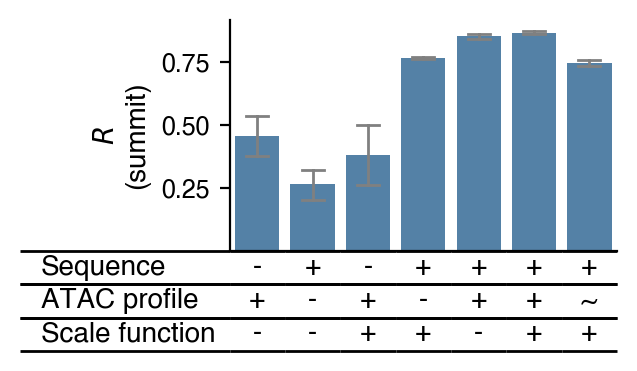

In [ ]:
init_eval_jobs = {
    "5D1": 
    {
        "+|+|+": get_bioqueue_file("{{History:31019-v0.2.0-5D1-PROcap-DPeval.csv}}"),
        "+|+|-": get_bioqueue_file("{{History:31010-v0.2.0-5D1-PROcap-NSF-DPeval.csv}}"),
        "+|~|+": get_bioqueue_file("{{History:31099-v0.2.0-5D1-PROcap-postTrainingShuffleATAC-exp-DPeval.csv}}"),
        "+|-|+": get_bioqueue_file("{{History:31023-v0.2.0-5D1-PROcap-seq-DPeval.csv}}"),
        "+|-|-": get_bioqueue_file("{{History:31022-v0.2.0-5D1-PROcap-Perturbation-SeqOnly-NSF-DPeval.csv}}"),
        "-|+|+": get_bioqueue_file("{{History:31014-v0.2.0-5D1-PROcap-Perturbation-AccOnly-DPeval.csv}}"),
        "-|+|-": get_bioqueue_file("{{History:30999-v0.2.0-5D1-PROcap-Perturbation-AccOnly-NSF-DPeval.csv}}"),
    },
    "5D2": 
    {
        "+|+|+": get_bioqueue_file("{{History:31021-v0.2.0-5D2-PROcap-DPeval.csv}}"),
        "+|+|-": get_bioqueue_file("{{History:31011-v0.2.0-5D2-PROcap-NSF-DPeval.csv}}"),
        "+|~|+": get_bioqueue_file("{{History:31100-v0.2.0-5D2-PROcap-postTrainingShuffleATAC-exp-DPeval.csv}}"),
        "+|-|+": get_bioqueue_file("{{History:31024-v0.2.0-5D2-PROcap-seq-DPeval.csv}}"),
        "+|-|-": get_bioqueue_file("{{History:31008-v0.2.0-5D2-PROcap-Perturbation-SeqOnly-NSF-DPeval.csv}}"),
        "-|+|+": get_bioqueue_file("{{History:31015-v0.2.0-5D2-PROcap-Perturbation-AccOnly-DPeval.csv}}"),
        "-|+|-": get_bioqueue_file("{{History:31000-v0.2.0-5D2-PROcap-Perturbation-AccOnly-NSF-DPeval.csv}}"),
    }
}

plot_order = ("-|+|-", "+|-|-", "-|+|+", "+|-|+", "+|+|-", "+|+|+", "+|~|+", )
fig, ax = plt.subplots(1, 1, figsize=(2.5, 1.5), sharex=True, sharey=True)
sns.barplot(
    x="Conf", y="Corr coef", 
    data=prep_bpr_dfs(init_eval_jobs), 
    order=plot_order,
    ax=ax, 
    color="steelblue",
    capsize=.4,
    err_kws={"color": ".5", "linewidth": 1.},
    linewidth=0, edgecolor=".5", 
)
ax.set_xlabel("")
ax.set_ylabel(r"$R$"+"\n(summit)")
ax.set_xticks([])
ax.set_yticks([0.25, 0.50, 0.75])

split_data = np.asarray([s.split('|') for s in plot_order]).T
plt.table(
    split_data,
    cellLoc="center",
    rowLabels=['Sequence', 'ATAC profile', 'Scale function'],
    colLabels=None,
    edges="horizontal"
)
sns.despine()

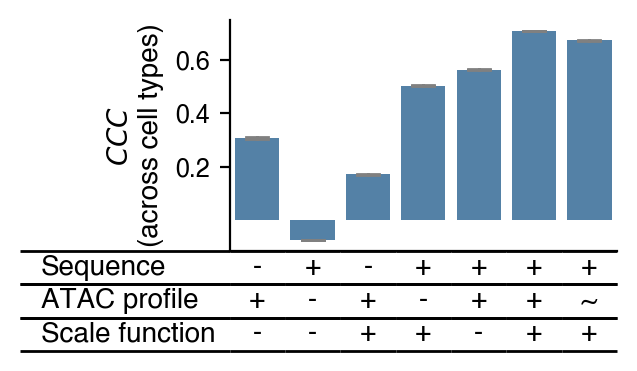

In [ ]:
init_eval_jobs = {
    "5D1": 
    {
        "+|+|+": get_bioqueue_file("{{History:20198-v0.2.0-5D1-PROcap-eval.crc.csv.gz}}"),
        "+|+|-": get_bioqueue_file("{{History:29915-v0.2.0-5D1-PROcap-NSF-eval.crc.csv.gz}}"),
        "+|~|+": get_bioqueue_file("{{History:29861-v0.2.0-5D1-PROcap-postTrainingShuffleATAC-eval.crc.csv.gz}}"),
        "+|-|+": get_bioqueue_file("{{History:24219-v0.2.0-5D1-PROcap-seq-eval.crc.csv.gz}}"),
        "+|-|-": get_bioqueue_file("{{History:30360-v0.2.0-5D1-PROcap-Perturbation-SeqOnly-NSF-eval.crc.csv.gz}}"),
        "-|+|+": get_bioqueue_file("{{History:29895-v0.2.0-5D1-PROcap-Perturbation-AccOnly-eval.crc.csv.gz}}"),
        "-|+|-": get_bioqueue_file("{{History:30361-v0.2.0-5D1-PROcap-Perturbation-AccOnly-NSF-eval.crc.csv.gz}}"),
    },
    "5D2": 
    {
        "+|+|+": get_bioqueue_file("{{History:20199-v0.2.0-5D2-PROcap-eval.crc.csv.gz}}"),
        "+|+|-": get_bioqueue_file("{{History:29916-v0.2.0-5D2-PROcap-NSF-eval.crc.csv.gz}}"),
        "+|~|+": get_bioqueue_file("{{History:29862-v0.2.0-5D2-PROcap-postTrainingShuffleATAC-eval.crc.csv.gz}}"),
        "+|-|+": get_bioqueue_file("{{History:24220-v0.2.0-5D2-PROcap-seq-eval.crc.csv.gz}}"),
        "+|-|-": get_bioqueue_file("{{History:30844-v0.2.0-5D2-PROcap-Perturbation-SeqOnly-NSF-eval.crc.csv.gz}}"),
        "-|+|+": get_bioqueue_file("{{History:30362-v0.2.0-5D2-PROcap-Perturbation-AccOnly-eval.crc.csv.gz}}"),
        "-|+|-": get_bioqueue_file("{{History:29901-v0.2.0-5D2-PROcap-Perturbation-AccOnly-NSF-eval.crc.csv.gz}}"),
    }
}

fig, ax = plt.subplots(1, 1, figsize=(2.5, 1.5), sharex=True, sharey=True)
sns.barplot(
    x="Conf", y="CCC", 
    data=prep_ccc_dfs(init_eval_jobs), 
    order=plot_order,
    estimator='median',
    color="steelblue",
    ax=ax,
    capsize=.4,
    err_kws={"color": ".5", "linewidth": 1.},
    linewidth=0, edgecolor=".5", 
)
ax.set_xlabel("")
ax.set_ylabel(r"$CCC$"+"\n(across cell types)")
ax.set_xticks([])
ax.set_yticks([0.2, 0.4, 0.6])

split_data = np.asarray([s.split('|') for s in plot_order]).T
plt.table(
    split_data,
    cellLoc="center",
    rowLabels=['Sequence', 'ATAC profile', 'Scale function'],
    colLabels=None,
    edges="horizontal"
)
sns.despine()